# Mathematical Operations

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame(np.ones([5,4]), columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0


In [3]:
# Basic math operations on a DataFrame perform the computation for every cell
df *= 2
df

,a,b,c,d
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,2.0
4,2.0,2.0,2.0,2.0


In [4]:
# You can also do calculations on specific rows or columns
df.loc[1] /= 2
df['b'] -= 1
df

,a,b,c,d
0,2.0,1.0,2.0,2.0
1,1.0,0.0,1.0,1.0
2,2.0,1.0,2.0,2.0
3,2.0,1.0,2.0,2.0
4,2.0,1.0,2.0,2.0


In [5]:
df2 = pd.DataFrame(np.ones([3,2]), columns=['d', 'e'], index=[2,4,5])
df2

,d,e
2,1.0,1.0
4,1.0,1.0
5,1.0,1.0


In [6]:
# Operating on two DataFrames:
# NaN for every combination of index/column that is not present in both inputs
df + df2

,a,b,c,d,e
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,3.0,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,3.0,NaN
5,NaN,NaN,NaN,NaN,NaN


In [7]:
# The same is true for operations on two Series
df.loc[2] * df2.loc[5]

a    NaN
b    NaN
c    NaN
d    2.0
e    NaN
dtype: float64

In [8]:
df.mean()

a    1.8
b    0.8
c    1.8
d    1.8
dtype: float64

In [9]:
# This is an operation on a DataFrame and a Series
# Series indices are matched on DataFrame column labels
df - df.mean()

,a,b,c,d
0,0.2,0.2,0.2,0.2
1,-0.8,-0.8,-0.8,-0.8
2,0.2,0.2,0.2,0.2
3,0.2,0.2,0.2,0.2
4,0.2,0.2,0.2,0.2


In [10]:
# Another operation on DataFrame and Series
# Here, again, we see that we get NaN if labels are not present in both inputs
df - pd.Series({'a':5, 'b':5, 'e':5, 'f': 5})

,a,b,c,d,e,f
0,-3.0,-4.0,NaN,NaN,NaN,NaN
1,-4.0,-5.0,NaN,NaN,NaN,NaN
2,-3.0,-4.0,NaN,NaN,NaN,NaN
3,-3.0,-4.0,NaN,NaN,NaN,NaN
4,-3.0,-4.0,NaN,NaN,NaN,NaN


In [11]:
# Normal math operators cannot get an axis argument
# To do this, there are functions for every math operator
df.sub( df.mean(axis=1), axis=0)

,a,b,c,d
0,0.25,-0.75,0.25,0.25
1,0.25,-0.75,0.25,0.25
2,0.25,-0.75,0.25,0.25
3,0.25,-0.75,0.25,0.25
4,0.25,-0.75,0.25,0.25


# Function Application

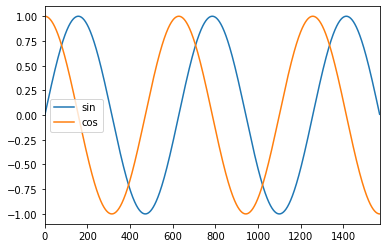

In [12]:
df = pd.DataFrame({'sin': np.arange(0, 5*np.pi, 0.01), 
                   'cos': np.arange(0.5*np.pi, 5.5*np.pi, 0.01)})

# Numpy ufuncs like np.sin operate on every cell
# Here we compute the sin for every cell in the dataframe
df = np.sin(df)

%matplotlib inline
df.plot()

In [13]:
def iqr(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    return q3 - q1 

# df.apply() executes the given function on a whole row or column
df.apply(iqr)

sin    1.347237
cos    1.413649
dtype: float64

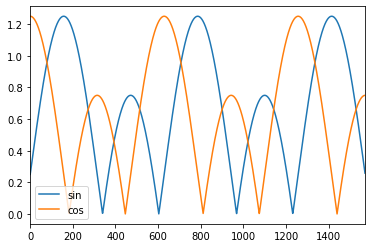

In [14]:
def somefunc(x):
    return np.abs(x+.25)

# df.applymap() applies the given function for every cell in the DataFrame
df.applymap(somefunc).plot()

## Groups and Aggregations with groupby()

In [15]:
athletes = pd.read_csv('athletes.csv')
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 12 columns):
id               11538 non-null int64
name             11538 non-null object
nationality      11538 non-null object
sex              11538 non-null object
date_of_birth    11538 non-null object
height           11208 non-null float64
weight           10879 non-null float64
sport            11538 non-null object
gold             11538 non-null int64
silver           11538 non-null int64
bronze           11538 non-null int64
info             131 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 1.1+ MB


In [16]:
# Simply calling groupby returns a GroupBy object 
# This does not calculate anything yet!
g = athletes.groupby('nationality')[['gold', 'silver', 'bronze']]

In [17]:
# Calling an aggregation function on the GroupBy object
# applies the calculation for every group
# and constructs a DataFrame with the results
g.sum()

,gold,silver,bronze
nationality,,,
AFG,0,0,0
ALB,0,0,0
ALG,0,2,0
AND,0,0,0
ANG,0,0,0
ANT,0,0,0
ARG,21,1,0
ARM,1,3,0
ARU,0,0,0


In [18]:
# We can select multiple columns to group by
# And we can select a subset of columns to do
g = athletes.groupby(['sport', 'sex'])[['weight', 'height']]

In [19]:
# Because we selected only 2 columns, this calculation will now be cheaper
g.mean()

weight    height
sport             sex                         
aquatics          female   62.284483  1.715712
                  male     82.219061  1.860342
archery           female   64.301587  1.676190
                  male     80.079365  1.795714
athletics         female   60.152542  1.690500
                  male     74.777680  1.809234
badminton         female   61.209877  1.686000
                  male     76.156627  1.805059
basketball        female   75.377622  1.833819
                  male    100.297872  2.003611
boxing            female         NaN  1.682222
                  male           NaN  1.757615
canoe             female   66.457944  1.700648
                  male     82.150000  1.820455
cycling           female   60.207254  1.673128
                  male     72.576052  1.793074
equestrian        female   58.634146  1.682530
                  male     72.954887  1.790000
fencing           female   62.733871  1.712581
                  male     78.785124  1.833802
football          female   61.061069  1.682710
                  male     74.451713  1.793746
golf              female   63.200000  1.691404
                  male     79.000000  1.793500
gymnastics        female   49.555024  1.616524
                  male     63.254545  1.677105
handball          female   70.789157  1.759722
                  male     95.431694  1.913169
hockey            female   60.425926  1.667870
                  male     77.375000  1.800093
judo              female   65.392157  1.665132
                  male     84.616740  1.781783
modern pentathlon female   58.000000  1.699444
                  male     73.916667  1.825278
rowing            female   69.776190  1.773286
                  male     86.504615  1.898708
rugby sevens      female   66.595890  1.678552
                  male     90.450331  1.829145
sailing           female   63.194969  1.692767
                  male     77.122066  1.812770
shooting          female   62.675676  1.648400
                  male     81.068966  1.780343
table tennis      female   57.530120  1.653659
                  male     72.558140  1.786860
taekwondo         female   61.258065  1.730159
                  male     74.809524  1.863750
tennis            female   64.670455  1.734205
                  male     80.417476  1.860388
triathlon         female   54.563636  1.676545
                  male     66.814815  1.788704
volleyball        female   70.684211  1.828691
                  male     89.421875  1.964010
weightlifting     female   68.788462  1.603558
                  male     87.538961  1.709221
wrestling         female   61.805310  1.651239
                  male     85.372881  1.757215

# Reshaping Rows and Colums with stack() and unstack()

In [20]:
m = pd.read_csv('monthly_data.csv')
m

,YYYY,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
0,2008,10140,10239,10050,10111,10159,10159,10141,10117,10178,10148,10125,10182,10146
1,2009,10137,10140,10140,10141,10188,10168,10128,10165,10208,10166,10041,10068,10141
2,2010,10151,10034,10168,10194,10158,10166,10158,10129,10147,10135,10057,10133,10136
3,2011,10182,10161,10227,10192,10182,10154,10123,10130,10149,10182,10194,10099,10165
4,2012,10194,10286,10271,10053,10159,10127,10139,10155,10149,10109,10108,10085,10153
5,2013,10142,10169,10099,10155,10113,10180,10201,10176,10151,10129,10155,10170,10153
6,2014,10055,10031,10164,10148,10154,10184,10143,10117,10189,10142,10103,10172,10134
7,2015,10135,10164,10198,10214,10152,10195,10142,10152,10171,10186,10150,10217,10173
8,2016,10100,10099,10144,10122,10140,10137,10168,10183,10177,10214,10144,10283,10159
9,2017,10228,10151,10154,10211,10170,10134,10141,10162,10135,10176,10141,10120,10160


In [21]:
# Preparation: move the 'YYYY' column into the index
m.set_index('YYYY', inplace=True)
m

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
YYYY,,,,,,,,,,,,,
2008,10140,10239,10050,10111,10159,10159,10141,10117,10178,10148,10125,10182,10146
2009,10137,10140,10140,10141,10188,10168,10128,10165,10208,10166,10041,10068,10141
2010,10151,10034,10168,10194,10158,10166,10158,10129,10147,10135,10057,10133,10136
2011,10182,10161,10227,10192,10182,10154,10123,10130,10149,10182,10194,10099,10165
2012,10194,10286,10271,10053,10159,10127,10139,10155,10149,10109,10108,10085,10153
2013,10142,10169,10099,10155,10113,10180,10201,10176,10151,10129,10155,10170,10153
2014,10055,10031,10164,10148,10154,10184,10143,10117,10189,10142,10103,10172,10134
2015,10135,10164,10198,10214,10152,10195,10142,10152,10171,10186,10150,10217,10173
2016,10100,10099,10144,10122,10140,10137,10168,10183,10177,10214,10144,10283,10159


In [22]:
# stack() moves data from rows into a single column
m.stack()

YYYY      
2008  JAN     10140
      FEB     10239
      MAR     10050
      APR     10111
      MAY     10159
      JUN     10159
      JUL     10141
      AUG     10117
      SEP     10178
      OCT     10148
      NOV     10125
      DEC     10182
      YEAR    10146
2009  JAN     10137
      FEB     10140
      MAR     10140
      APR     10141
      MAY     10188
      JUN     10168
      JUL     10128
      AUG     10165
      SEP     10208
      OCT     10166
      NOV     10041
      DEC     10068
      YEAR    10141
2010  JAN     10151
      FEB     10034
      MAR     10168
      APR     10194
              ...  
2015  OCT     10186
      NOV     10150
      DEC     10217
      YEAR    10173
2016  JAN     10100
      FEB     10099
      MAR     10144
      APR     10122
      MAY     10140
      JUN     10137
      JUL     10168
      AUG     10183
      SEP     10177
      OCT     10214
      NOV     10144
      DEC     10283
      YEAR    10159
2017  JAN     10228
      FEB

In [23]:
# stack() also allows quick calculations over all cells
m.stack().sum()

1319751

In [24]:
w = athletes.groupby(['sport', 'sex'])['weight'].mean()
w

sport              sex   
aquatics           female     62.284483
                   male       82.219061
archery            female     64.301587
                   male       80.079365
athletics          female     60.152542
                   male       74.777680
badminton          female     61.209877
                   male       76.156627
basketball         female     75.377622
                   male      100.297872
boxing             female           NaN
                   male             NaN
canoe              female     66.457944
                   male       82.150000
cycling            female     60.207254
                   male       72.576052
equestrian         female     58.634146
                   male       72.954887
fencing            female     62.733871
                   male       78.785124
football           female     61.061069
                   male       74.451713
golf               female     63.200000
                   male       79.000000
gymnastics    

In [25]:
# unstack() takes the inner index level and creates a column for every unique index
# It then moves the data into these columns
w.unstack()

sex,female,male
sport,,
aquatics,62.284483,82.219061
archery,64.301587,80.079365
athletics,60.152542,74.777680
badminton,61.209877,76.156627
basketball,75.377622,100.297872
boxing,NaN,NaN
canoe,66.457944,82.150000
cycling,60.207254,72.576052
equestrian,58.634146,72.954887


# Reshaping Rows and Colums with pivot()

In [26]:
p = pd.DataFrame({'id': [823905, 823905,
                         235897, 235897, 235897,
                         983422, 983422],
                  'item': ['prize', 'unit', 
                           'prize', 'unit', 'stock', 
                           'prize', 'stock'],
                  'value': [3.49, 'kg',
                            12.89, 'l', 50,
                            0.49, 4]})
p

,id,item,value
0,823905,prize,3.49
1,823905,unit,kg
2,235897,prize,12.89
3,235897,unit,l
4,235897,stock,50
5,983422,prize,0.49
6,983422,stock,4


In [27]:
# pivot() moves data from rows into columns
# so that we end up with a wider, shorter DataFrame

# The first argument is the column that will be used for row indices
# The second argument is the column that will be used to create column labels
p.pivot('id', 'item')

value           
item    prize stock unit
id                      
235897  12.89    50    l
823905   3.49   NaN   kg
983422   0.49     4  NaN

In [28]:
grades = pd.DataFrame([[6, 4, 5], [7, 8, 7], [6, 7, 9], [6, 5, 5], [5, 2, 7]], 
                       index = ['Mary', 'John', 'Ann', 'Pete', 'Laura'],
                       columns = ['test_1', 'test_2', 'test_3'])
grades.reset_index(inplace=True)
grades

,index,test_1,test_2,test_3
0,Mary,6,4,5
1,John,7,8,7
2,Ann,6,7,9
3,Pete,6,5,5
4,Laura,5,2,7


In [29]:
# melt() is the opposite of pivot()
# It moves the data from the rows into a single column
# The column names will show up in a new column called "variable"
grades.melt(id_vars=['index'])

,index,variable,value
0,Mary,test_1,6
1,John,test_1,7
2,Ann,test_1,6
3,Pete,test_1,6
4,Laura,test_1,5
5,Mary,test_2,4
6,John,test_2,8
7,Ann,test_2,7
8,Pete,test_2,5
9,Laura,test_2,2


# Combining Datasets

In [30]:
grades = pd.DataFrame([[6, 4, 5], [7, 8, 7], [6, 7, 9], [6, 5, 5], [5, 2, 7]], 
                       index = ['Mary', 'John', 'Ann', 'Pete', 'Laura'],
                       columns = ['test_1', 'test_2', 'test_3'])
grades

,test_1,test_2,test_3
Mary,6,4,5
John,7,8,7
Ann,6,7,9
Pete,6,5,5
Laura,5,2,7


In [31]:
# Adding a new column -- needs an indexed datastructure (Series)
grades['test_4'] = pd.Series({'John': 5, 'Ann': 8, 'Pete': 9, 'Mary': 7, 'Laura': 10})
grades

,test_1,test_2,test_3,test_4
Mary,6,4,5,7
John,7,8,7,5
Ann,6,7,9,8
Pete,6,5,5,9
Laura,5,2,7,10


In [32]:
# Adding a row with .loc -- no Series necessary
grades.loc['Bob'] = [2,3,4,5]
grades

,test_1,test_2,test_3,test_4
Mary,6,4,5,7
John,7,8,7,5
Ann,6,7,9,8
Pete,6,5,5,9
Laura,5,2,7,10
Bob,2,3,4,5


In [33]:
# We can also use append
# But in that case we need a Series with a name (will be used as row index)
new_row = pd.Series({'test_1': 5, 'test_2': 6, 'test_3': 7, 'test_4': 8}, name="Kim")
grades.append(new_row)

,test_1,test_2,test_3,test_4
Mary,6,4,5,7
John,7,8,7,5
Ann,6,7,9,8
Pete,6,5,5,9
Laura,5,2,7,10
Bob,2,3,4,5
Kim,5,6,7,8


In [34]:
grades['stud_nr'] = [113, 121, 123, 135, 139, 141]
grades = grades[['stud_nr', 'test_1', 'test_2', 'test_3', 'test_4']]
grades

,stud_nr,test_1,test_2,test_3,test_4
Mary,113,6,4,5,7
John,121,7,8,7,5
Ann,123,6,7,9,8
Pete,135,6,5,5,9
Laura,139,5,2,7,10
Bob,141,2,3,4,5


In [35]:
other = pd.DataFrame([[139, 7, 7],
                       [123, 8, 6],
                       [142, 4, 5],
                       [113, 7, 9],
                       [155, 10, 9],
                       [121, 6, 4]], 
                       columns = ['stud_nr', 'exam1', 'exam2'])
other

,stud_nr,exam1,exam2
0,139,7,7
1,123,8,6
2,142,4,5
3,113,7,9
4,155,10,9
5,121,6,4


In [36]:
# Merging two DataFrames
# By default this does an inner join on the common column (stud_nr)
grades.merge(other)

,stud_nr,test_1,test_2,test_3,test_4,exam1,exam2
0,113,6,4,5,7,7,9
1,121,7,8,7,5,6,4
2,123,6,7,9,8,8,6
3,139,5,2,7,10,7,7


In [37]:
# We can also specify other join types: left, right, outer
grades.merge(other, how='outer')

,stud_nr,test_1,test_2,test_3,test_4,exam1,exam2
0,113,6.0,4.0,5.0,7.0,7.0,9.0
1,121,7.0,8.0,7.0,5.0,6.0,4.0
2,123,6.0,7.0,9.0,8.0,8.0,6.0
3,135,6.0,5.0,5.0,9.0,NaN,NaN
4,139,5.0,2.0,7.0,10.0,7.0,7.0
5,141,2.0,3.0,4.0,5.0,NaN,NaN
6,142,NaN,NaN,NaN,NaN,4.0,5.0
7,155,NaN,NaN,NaN,NaN,10.0,9.0
